##**Laptop Price Prediction**

In [ ]:
import pandas as pd #importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/laptop.csv') #load the dataset
dflaptop1 = df.copy()
dflaptop1.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


The dataset contains numerous columns with a lot of noise and redundant information. Despite these challenges, through effective ,data cleaning and feature engineering, we can extract relevant features and achieve better results. Although the dataset is relatively small, we are confident that our approach will yield good accuracy.

##**Basic Data Reading and Cleaning**

* Dropped unwanted columns ('Unnamed: 0.1', 'Unnamed: 0')

* Handled missing values by dropping rows with null values

* Replaced invalid entries (e.g., replacing '?' with mode values in columns like Weight, Inches, Memory)

* Converted columns to appropriate data types (e.g., Weight to float, Ram to int)

* Remove str values kg, GB from Weight and Ram columns respectively.

In [ ]:
dflaptop1.sample(3)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
704,704,704.0,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.90kg,23976.00
1132,1132,1132.0,Asus,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.84
1249,1249,1249.0,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,96596.64


In [ ]:
dflaptop1.drop(columns = ['Unnamed: 0.1','Unnamed: 0'], inplace = True) #dropping unwanted columns

In [ ]:
dflaptop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
dflaptop1.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [ ]:
dflaptop1.dropna(inplace = True) #dropping Null Values in Dataset
dflaptop1.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
dflaptop1.shape

(1273, 11)

In [ ]:
dflaptop1.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
col = dflaptop1.columns
for i in col:
  a = dflaptop1[dflaptop1[i]=='?']
  print(a)

Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []
Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []
    Company     TypeName Inches   ScreenResolution  \
476    Dell  Workstation      ?  Full HD 1920x1080   

                             Cpu  Ram     Memory                  Gpu  \
476  Intel Core i7 7700HQ 2.8GHz  8GB  256GB SSD  Nvidia Quadro M1200   

          OpSys  Weight      Price  
476  Windows 10  1.78kg  128298.24  
Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []
Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []
Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []
    Company  TypeName Inches   ScreenRes

In [ ]:
dflaptop1['Weight'] = dflaptop1['Weight'].replace('?', dflaptop1['Weight'].mode()[0])
dflaptop1['Inches'] = dflaptop1['Inches'].replace('?', dflaptop1['Inches'].mode()[0])
dflaptop1['Memory'] = dflaptop1['Memory'].replace('?', dflaptop1['Memory'].mode()[0])

In [ ]:
dflaptop1['Ram'] = dflaptop1['Ram'].replace('nan', dflaptop1['Ram'].mode()[0])

In [ ]:
dflaptop1['Weight'] = dflaptop1['Weight'].str.replace('kg','').astype(float)
dflaptop1['Ram'] = dflaptop1['Ram'].str.replace('GB','').astype(int)
dflaptop1['Inches'] = dflaptop1['Inches'].astype(float)

In [ ]:
dflaptop1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.3+ KB


##**EDA and Feature Engineering**

EDA helps in understanding the impact of each feature on the target variable(Price). We will explore each column to assess its influence, performing necessary preprocessing and feature engineering along the way. The goal is to prepare and clean the data for better machine learning modeling, aiming for high performance and generalized models. Let’s start analyzing and preparing the dataset for predictions.

##**Target Variable (Price Column)**

When working with a regression model, it's crucial to understand how the target variable is distributed. In our case, a right-skewed distribution of the target variable (laptop prices) indicates that lower-priced laptops (budget laptops) are more common than higher-priced ones (premium laptops).

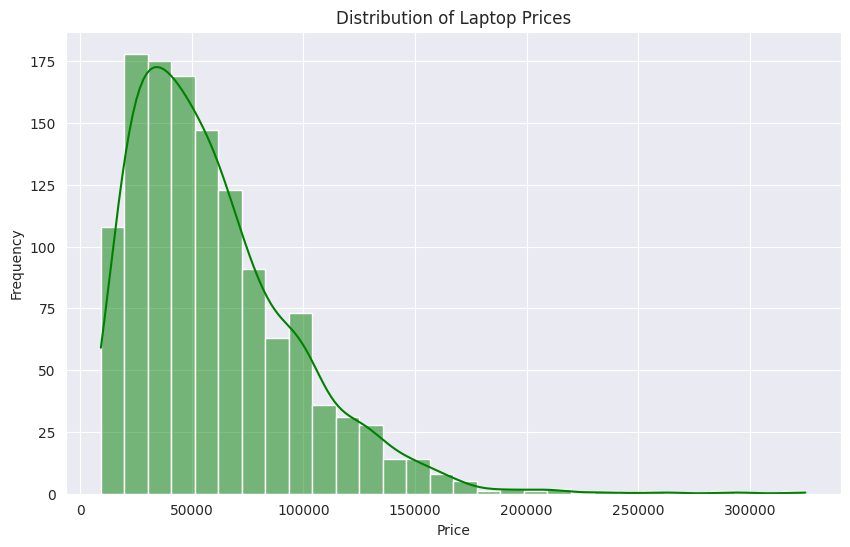

In [ ]:
#Set the plot style
sns.set_style('darkgrid')

# Distribution of laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(dflaptop1['Price'], kde=True, bins=30,color = 'green')

plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# Distribution is right skewed

##**Analyze the Company Column**

In [ ]:
px.box(dflaptop1, y='Price',x ='Company',color='Company')

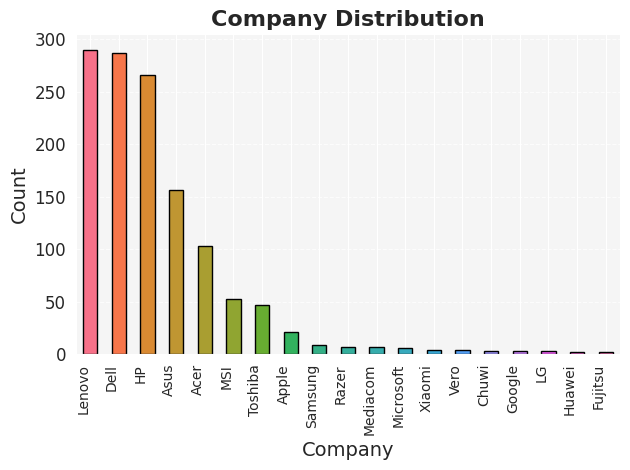

In [ ]:
palette = sns.color_palette("husl", dflaptop1['Company'].nunique())

dflaptop1['Company'].value_counts().plot(kind='bar', color=palette, edgecolor='black')
plt.title('Company Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

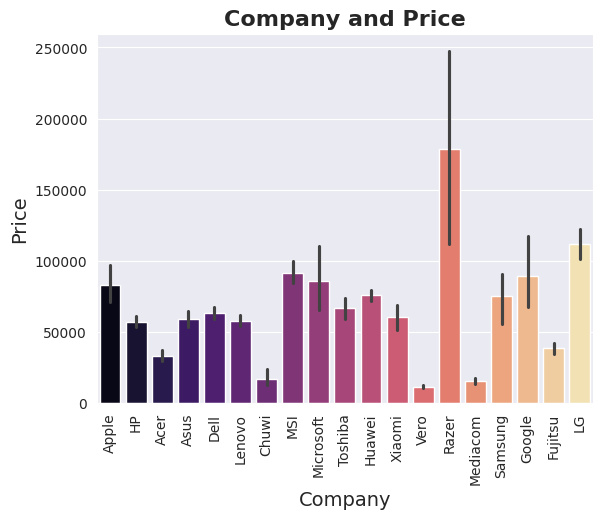

In [ ]:
sns.barplot(x = 'Company', y = 'Price', data = dflaptop1, hue = 'Company', palette = 'magma')
plt.xticks(rotation = 'vertical')
plt.title('Company and Price',fontsize=16, fontweight='bold')
plt.xlabel('Company',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

As we Observe from the graph we see that the prices of laptop varies with different brands. Razer, Apple, LG, MSI, Google and Microsoft laptops are expensive and others are in budget range.

##**Analyze the TypeName Column**

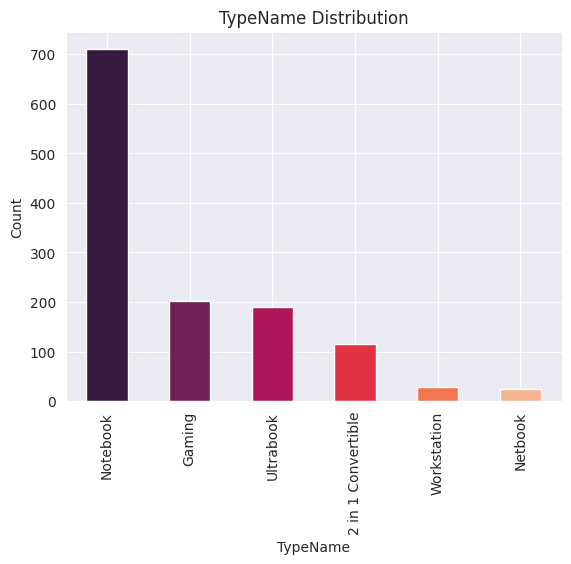

In [ ]:
dflaptop1['TypeName'].value_counts().plot(kind = 'bar', color = sns.color_palette('rocket'))
plt.title('TypeName Distribution')
plt.xlabel('TypeName')
plt.ylabel('Count')
plt.show()

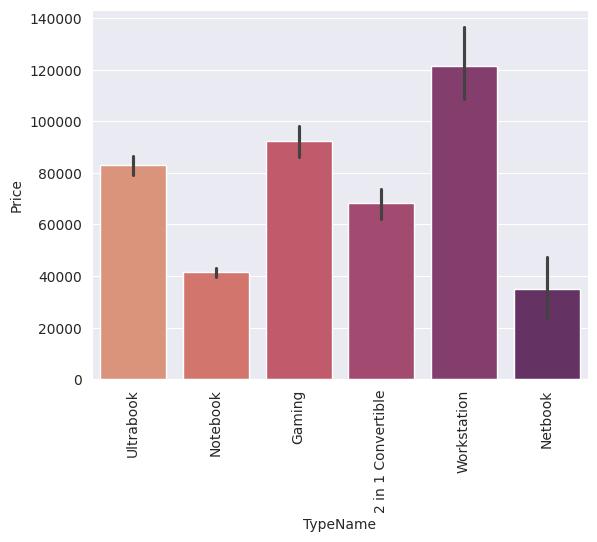

In [ ]:
sns.barplot(x = 'TypeName', y = 'Price', data = dflaptop1, hue = 'TypeName', palette = 'flare')
plt.xticks(rotation = 'vertical')
plt.show()

Most of the people prefer noteboook,because it is under budget and the same we can conclude from our data. We also conclude that price of laptop varies with laptop type.

##**Analyze the Inches Column**

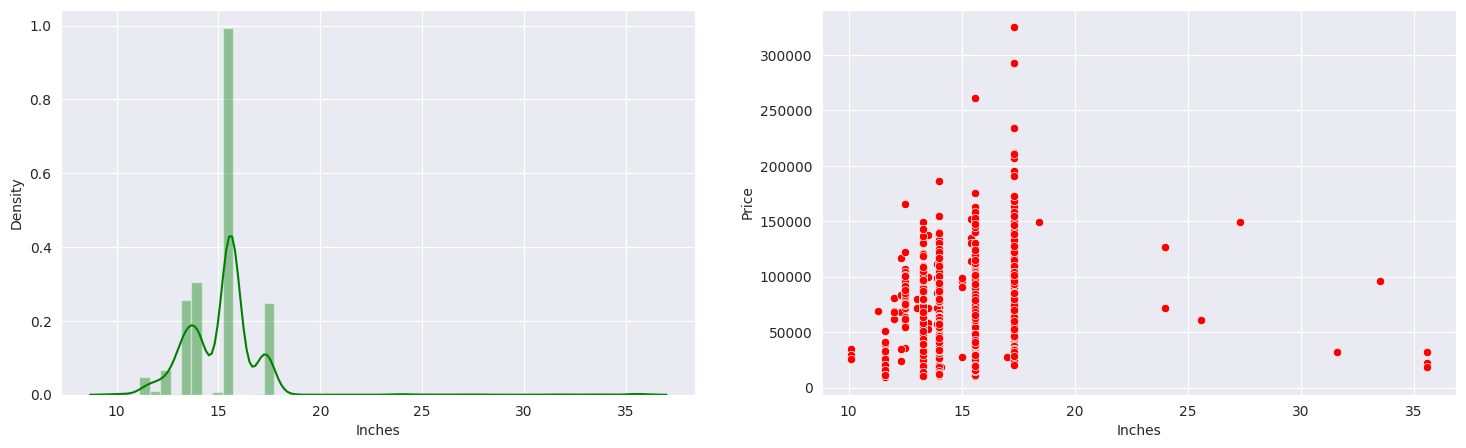

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.distplot(dflaptop1['Inches'], kde = True,color = 'green')
plt.subplot(1,2,2)
sns.scatterplot(x = 'Inches', y = 'Price', data = dflaptop1,color = 'red')
plt.show()

In [ ]:
dflaptop1['Inches'].corr(dflaptop1['Price']) # very weak  relation between Size of laptop and Price

0.044966188643858276

The correlation coefficient between size and price is 0.04, indicating a very weak relationship between the size and price of a laptop.

##**Analyze the ScreenResolution Column**

Screen resolution contains a lot of information and is quite noisy. Before any analysis, we need to perform feature engineering on it. By examining the unique values, we can extract three new columns: IPS panel presence, touchscreen capability, and resolution (X and Y axis).

In [ ]:
dflaptop1.ScreenResolution.value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
def extract_resolution_type(resolution):
    if '4K' in resolution or '3840x2160' in resolution:
        return '4K'
    elif 'Quad HD+' in resolution or '3200x1800' in resolution:
        return 'QHD'
    elif 'Full HD' in resolution or '1920x1080' in resolution:
        return 'Full HD'
    elif '2K' in resolution or '2560x1440' in resolution:
        return '2K'

    elif '1366x768' in resolution:
        return 'HD'
    else:
        return 'Others'

dflaptop1['Resolution_Type'] = dflaptop1['ScreenResolution'].apply(extract_resolution_type)
dflaptop1.Resolution_Type.value_counts()

,count
Resolution_Type,
Full HD,827
HD,300
Others,57
4K,42
QHD,29
2K,18


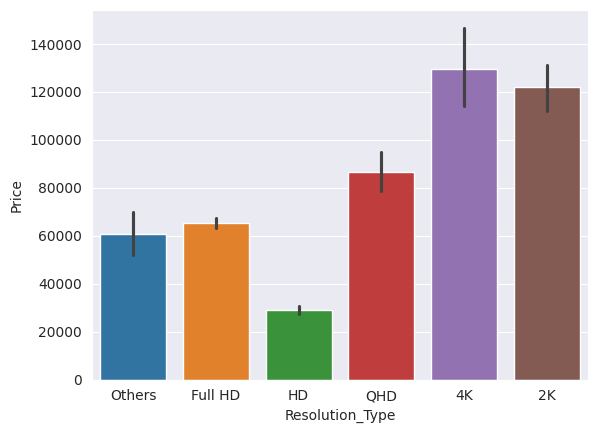

In [ ]:
sns.barplot(x = 'Resolution_Type', y = 'Price', data = dflaptop1, hue = 'Resolution_Type')
plt.show()            #Price of a laptop varies with Resolution

In [ ]:
dflaptop1['TouchScreen'] = dflaptop1['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
dflaptop1['TouchScreen'].value_counts()

,count
TouchScreen,
0,1088
1,185


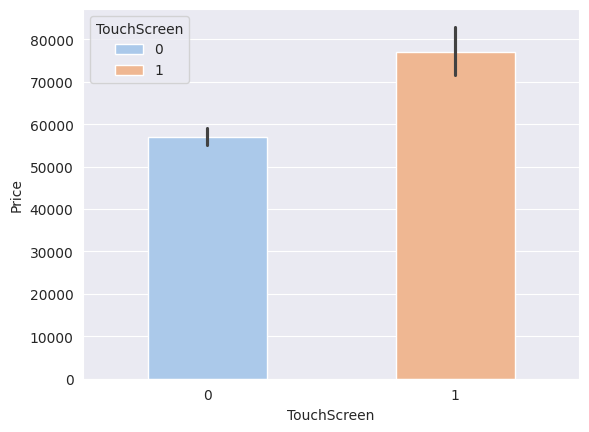

In [ ]:
sns.barplot(x = 'TouchScreen', y = 'Price', data = dflaptop1, hue = 'TouchScreen',gap=0.4, palette = 'pastel')
plt.show()

We encoded the touchscreen column as a binary variable: 1 for touchscreen and 0 for non-touchscreen. The graph shows that touchscreen laptops are generally more expensive, which aligns with real-life observations.

In [ ]:
dflaptop1['Ips'] = dflaptop1['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
dflaptop1['Ips'].value_counts()

,count
Ips,
0,914
1,359


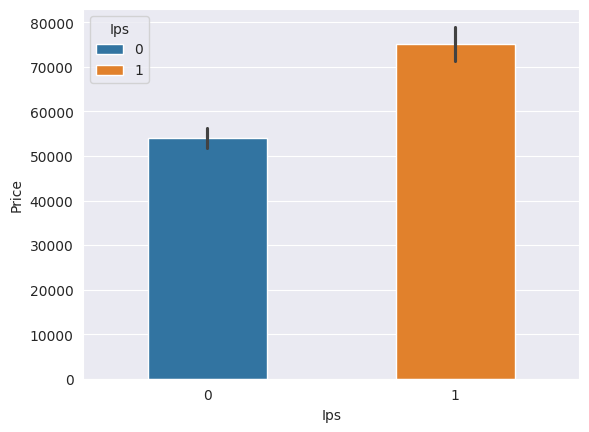

In [ ]:
sns.barplot(x = 'Ips', y = 'Price', data = dflaptop1, hue = 'Ips',gap=0.4)
plt.show()

Similarly, the IPS column is binary: 1 for IPS panels and 0 for non-IPS. Although IPS laptops are less common in our dataset, they tend to be higher priced.

In [ ]:
#Above graphs shows that TouchScreen and Ips features of laptop affect the price of laptop,
#so, we make a new feature called 'ppi(pixels per inch)' using Resolutin feature and Size feature...

In [ ]:
xyz = dflaptop1['ScreenResolution'].str.split('x', n = 1, expand = True)
xyz

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [ ]:
dflaptop1['X_res'] = xyz[0]
dflaptop1['Y_res'] = xyz[1]
dflaptop1['X_res'] = dflaptop1['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
dflaptop1['X_res'] = dflaptop1['X_res'].astype(int)
dflaptop1['Y_res'] = dflaptop1['Y_res'].astype(int)

In [ ]:
dflaptop1['ppi'] = (((dflaptop1['X_res']**2) + (dflaptop1['Y_res']**2))**0.5/dflaptop1['Inches']).astype(float)
dflaptop1['ppi'].corr(dflaptop1['Price']) # moderately correlated

0.4686360543472124

In [ ]:
#Now we drop the columns that are redundant
dflaptop1.drop(columns = ['ScreenResolution','X_res','Y_res','Inches','Resolution_Type'], inplace = True)
dflaptop1.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


Using the corr method, we found that laptop size (inches) has a weak correlation with price, while X and Y axis resolution have a strong correlation. To leverage this, we combined these into a single column, pixels per inch (PPI), which has a correlation of 0.47 with price. We then dropped the unnecessary columns: screen resolution, inches, and X and Y resolutions.

##**Analyze Cpu Feature**

In [ ]:
print(dflaptop1.Cpu.unique())
print(dflaptop1.Cpu.value_counts())

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Celeron Dual Core N3060 1.6GHz' 'Intel Core i5 1.3GHz'
 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 6200U 2.3GHz'
 'Intel Core M 6Y75 1.2GHz' 'Intel Core i5 7500U 

In [ ]:
dflaptop1['Cpu_Name'] = dflaptop1.Cpu.apply(lambda x: " ".join(x.split()[0:3]))

In [ ]:
def taking_processor(name):
  if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
    return name
  else:
    if name.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [ ]:
#Making new Feature called CpuBrand
dflaptop1['Cpu_Brand'] = dflaptop1['Cpu_Name'].apply(taking_processor)
dflaptop1.drop(columns = ['Cpu', 'Cpu_Name'], inplace = True)  # Dropping Redundant columns

Text(0, 0.5, 'Count')

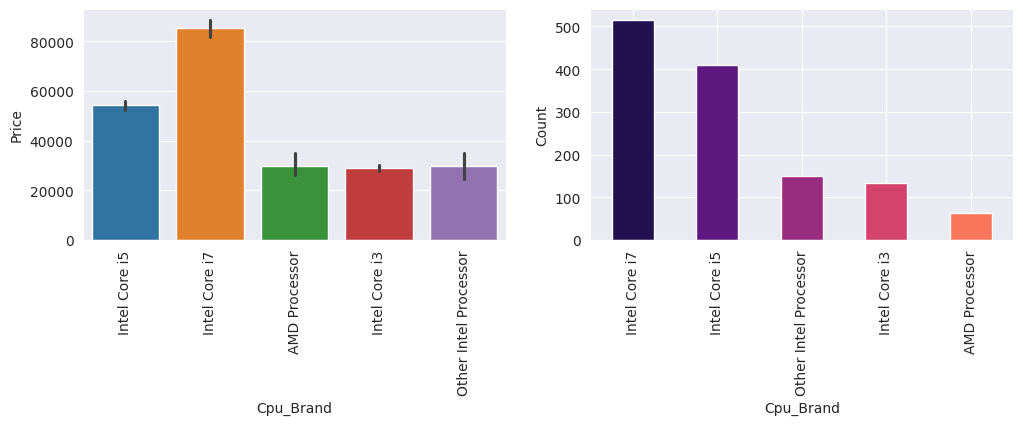

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
sns.barplot(x = 'Cpu_Brand', y = 'Price', data = dflaptop1, hue = 'Cpu_Brand')
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
dflaptop1.Cpu_Brand.value_counts().plot(kind = 'bar', color = sns.color_palette("magma"))
plt.ylabel('Count')

The CPU column has a lot of information, with 118 different categories. To simplify, we extracted the first three words to identify the preprocessor type, focusing on five categories: i3, i5, i7, other Intel processors, and AMD processors. We found that laptops with i7 processors are the most expensive, while i5, i3, AMD, and other processors fall into a similar price range. So, the type of preprocessor significantly influences the laptop's price.

##**Analyze the Ram Column**

Text(0, 0.5, 'Count')

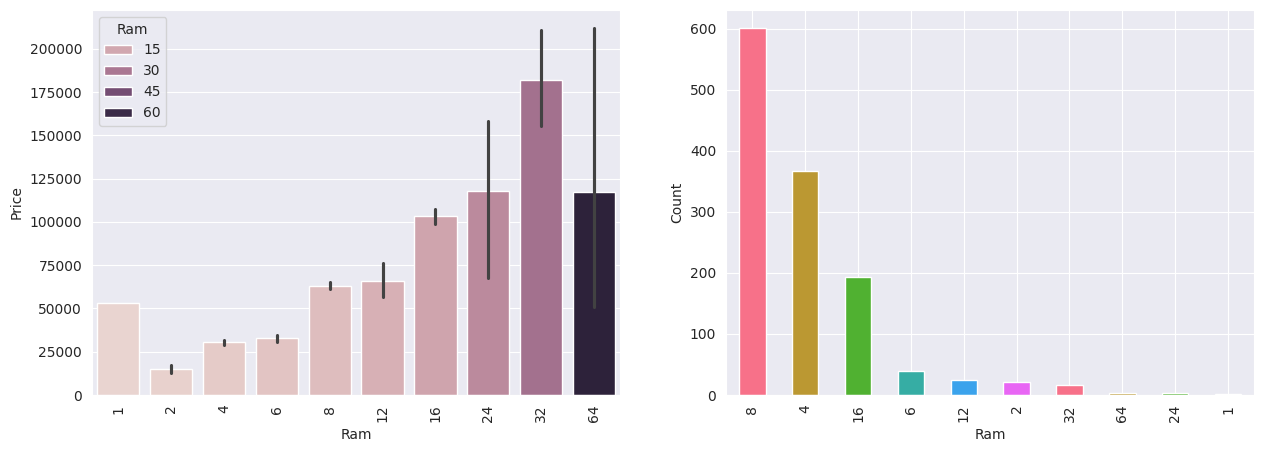

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x = 'Ram', y = 'Price', data = dflaptop1, hue = 'Ram')
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
dflaptop1.Ram.value_counts().plot(kind = 'bar', color = sns.color_palette("husl"))
plt.ylabel('Count')

From the graph, we can see that RAM affects the price: as RAM increases, so does the price. The correlation between price and RAM is quite high at 0.68. 8 GB RAM is the most popular choice among buyers.

In [ ]:
dflaptop1['Ram'].corr(dflaptop1['Price']) #moderately correlated

0.6856477245388354

In [ ]:
dflaptop1['Memory'].value_counts()

,count
Memory,
256GB SSD,402
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [ ]:
dflaptop1['Memory'] = dflaptop1['Memory'].astype(str).replace('\.0', '', regex=True)
dflaptop1.Memory = dflaptop1.Memory.str.replace('GB', '')
dflaptop1.Memory = dflaptop1.Memory.str.replace('TB', '000')
new = dflaptop1.Memory.str.split("+", n = 1, expand = True)

dflaptop1['first']= new[0]
dflaptop1['first']=dflaptop1['first'].str.strip()
dflaptop1['Second'] = new[1]
dflaptop1['Layer1HDD'] = dflaptop1['first'].apply(lambda x: 1 if "HDD" in x else 0)
dflaptop1['Layer1SSD'] = dflaptop1['first'].apply(lambda x: 1 if "SSD" in x else 0)
dflaptop1['Layer1Hybrid'] = dflaptop1['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
dflaptop1['Layer1Flash_Storage'] = dflaptop1['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)
dflaptop1['first'] = dflaptop1['first'].str.replace(r'\D', '',regex = True)
dflaptop1['Second'].fillna("0", inplace = True)
dflaptop1['layer2HDD'] = dflaptop1['Second'].apply(lambda x: 1 if "HDD" in x else 0)
dflaptop1['layer2SSD'] = dflaptop1['Second'].apply(lambda x: 1 if "SSD" in x else 0)
dflaptop1['layer2Hybrid'] = dflaptop1['Second'].apply(lambda x: 1 if "Hybrid" in x else 0)
dflaptop1['layer2Flash_Storage'] = dflaptop1['Second'].apply(lambda x: 1 if "Flash Storage" in x else 0)
dflaptop1['Second'] = dflaptop1['Second'].str.replace(r'\D', '', regex = True)
dflaptop1['Second'] = dflaptop1['Second'].astype(int)
dflaptop1['first'] = dflaptop1['first'].astype(int)

dflaptop1['HDD'] = (dflaptop1['first'] * dflaptop1['Layer1HDD'] + dflaptop1['Second'] * dflaptop1['layer2HDD'])
dflaptop1['SSD'] = (dflaptop1['first'] * dflaptop1['Layer1SSD'] + dflaptop1['Second'] * dflaptop1['layer2SSD'])
dflaptop1['Hybrid'] = (dflaptop1['first'] * dflaptop1['Layer1Hybrid'] + dflaptop1['Second'] * dflaptop1['layer2Hybrid'])
dflaptop1['Flash_Storage'] = (dflaptop1['first'] * dflaptop1['Layer1Flash_Storage'] + dflaptop1['Second'] * dflaptop1['layer2Flash_Storage'])


In [ ]:
print(dflaptop1['SSD'].corr(dflaptop1['Price'])) #correlated
print(dflaptop1['HDD'].corr(dflaptop1['Price'])) # negatively correlated
print(dflaptop1['Hybrid'].corr(dflaptop1['Price'])) # no correlation
print(dflaptop1['Flash_Storage'].corr(dflaptop1['Price'])) # negatively correlated

0.6687162491790412
-0.09539351887928345
0.007842663629770118
-0.0383322018360443


In [ ]:
#dropping unnecessary columns
dflaptop1.drop(columns = ['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','layer2HDD','layer2SSD','layer2Hybrid','layer2Flash_Storage','Hybrid','Flash_Storage'],inplace = True)


In [ ]:
dflaptop1.drop(columns=['Memory'],inplace = True)

The Memory column is quite noisy and includes various types such as HDD, SSD, Flash storage, and Hybrid storage. Many laptops come with both HDD and SSD, or have an external slot for upgrades, making this column potentially disruptive for our analysis if not handled properly.
By examining the value counts, we identified four categories: HDD, SSD, Flash storage, and Hybrid. Looking at the correlations with price: ** SSD: 0.67 ** HDD: -0.1 ** Hybrid: 0.01 ** Flash storage: -0.04
Since Hybrid and Flash storage show very little to no correlation with price, we decided to drop this column, along with the Cpu and memory columns, which are no longer required.

##**Analyze the Gpu Column**

In [ ]:
dflaptop1.Gpu.value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
dflaptop1['Gpu_Brand'] = dflaptop1['Gpu'].apply(lambda x:x.split()[0])
dflaptop1.Gpu_Brand.value_counts()

,count
Gpu_Brand,
Intel,703
Nvidia,393
AMD,176
ARM,1


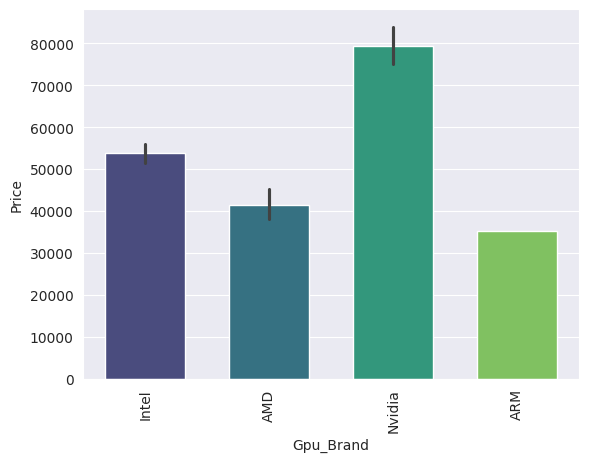

In [ ]:
sns.barplot(x = 'Gpu_Brand', y = 'Price', data = dflaptop1, hue = 'Gpu_Brand',gap = 0.2, palette = 'viridis')
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
dflaptop1 = dflaptop1[dflaptop1['Gpu_Brand'] != 'ARM']

In [ ]:
dflaptop1.drop(columns = 'Gpu', inplace = True)

We have categorized GPU(Graphical Processing Unit)s based on their brands: Intel, AMD, and Nvidia. To achieve this, we created a new column called Gpu_brand by extracting brand names from the existing GPU column. We excluded the row that contains ARM GPU, as it's the only exception. Once this transformation completed, we removed the original GPU column from the dataset.

##**Analyze the OpSys Column**

In [ ]:
dflaptop1.OpSys.value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


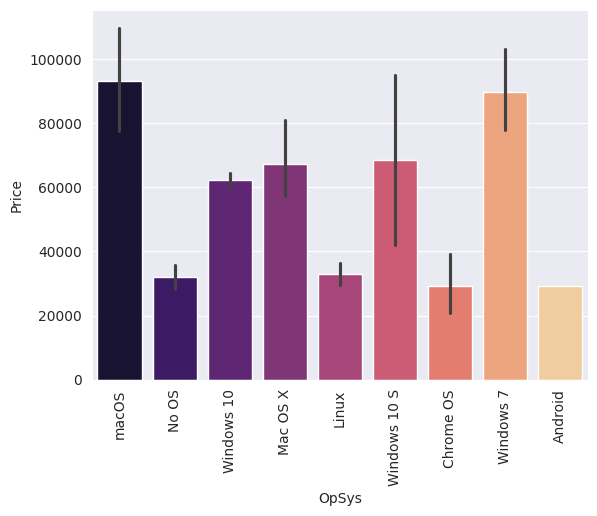

In [ ]:
sns.barplot(x = 'OpSys', y = 'Price', data = dflaptop1, hue = 'OpSys', palette= 'magma')
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
    return 'Windows'
  elif text == 'macOS' or text == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'
dflaptop1['Os'] = dflaptop1['OpSys'].apply(os) # make new column called 'Os'

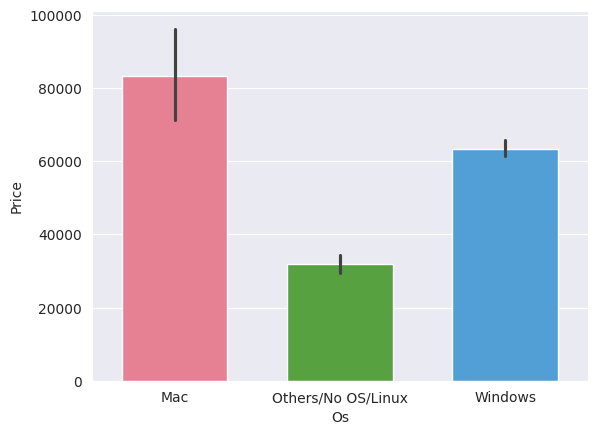

In [ ]:
sns.barplot(x = 'Os', y = 'Price', data = dflaptop1, palette = 'husl',gap = 0.2)
plt.show()

In [ ]:
dflaptop1.drop(columns = ['OpSys'], inplace = True) # now it become unwanted so we drop it

There are various categories of operating systems. We grouped all Windows categories together, grouped Mac into another category, and classified the remaining operating systems under "Others." According to the graph, Mac remains consistently the most expensive, which is a commonly observed trend.

#**Analyze the Weight Column**

In [ ]:
px.scatter(dflaptop1, x = 'Weight', y = 'Price', color = 'Weight',width =1000,height = 500)

In [ ]:
dflaptop1['Weight'].corr(dflaptop1['Price']) #Small Correlation with Price of a Laptop

0.17548638466369756

The weight column shows a very weak correlation of 0.18 with the price, indicating a minor influence on pricing of laptop.

##**Correlation of Feature with the target Variable Price**

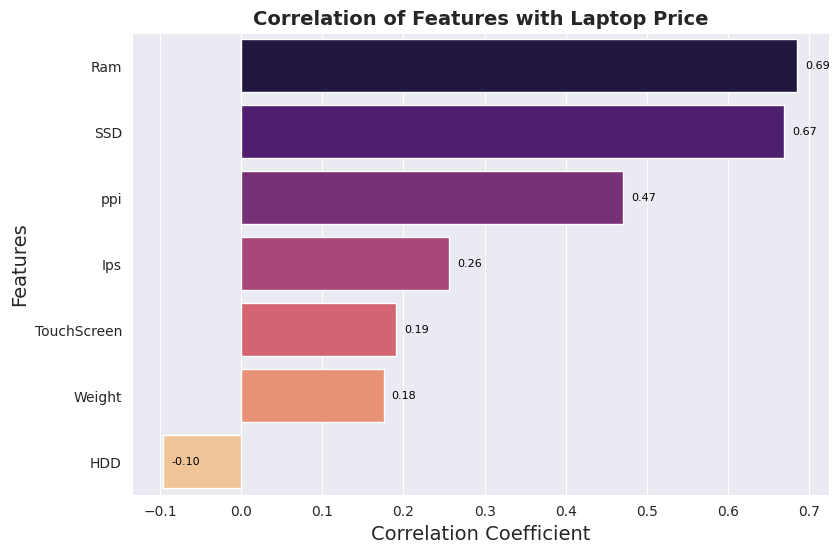

In [ ]:
# Select only numerical columns including the target variable 'Price'
numerical_columns = dflaptop1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Extract the correlation of 'Price' with other features
price_corr = corr_matrix['Price'].sort_values(ascending=False)
price_corr.drop('Price', inplace=True)


# Plot the correlation values
plt.figure(figsize=(9,6))
sns.barplot(x=price_corr.values, y=price_corr.index, palette="magma")
for i, value in enumerate(price_corr.values):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center', ha='left', fontsize=8, color='black')
plt.title('Correlation of Features with Laptop Price', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
dflaptop2 = dflaptop1.copy()
dflaptop2_encoded = pd.get_dummies(dflaptop2,dtype=int)
dflaptop2_encoded = dflaptop2_encoded.drop(['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi', 'HDD', 'SSD',],axis=1)
dflaptop2_encoded
# Calculate the correlation matrix
corr_matrix = dflaptop2_encoded.corr(method='spearman')
# Extract the correlation of 'Price' with other features
price_corr = corr_matrix['Price'].sort_values(ascending=False)
price_corr.drop('Price', inplace=True)

a = px.bar(x=price_corr.values, y=price_corr.index, color = price_corr.values,width = 1000, height = 900)
a.update_layout(title_text='Correlation of Categorical Features with Laptop Price',
                xaxis_title='Correlation Coefficient',yaxis_title='Features',template='plotly_dark')
a.show()

In [ ]:
dflaptop1.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


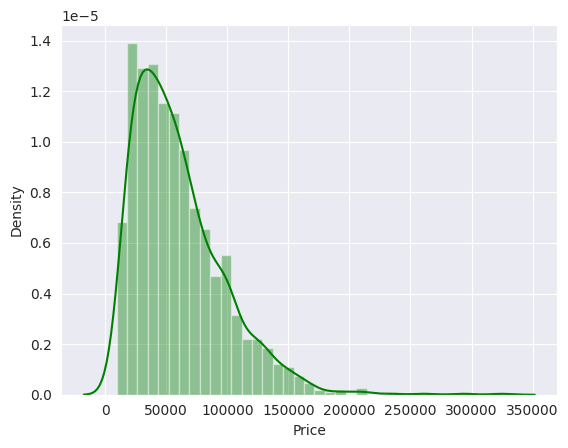

In [ ]:
sns.distplot(dflaptop1.Price, color = 'green') #right skewed distribution of price
plt.show()

We observed that the target variable's distribution was right-skewed. Transforming it to a normal distribution will improve the algorithm's performance. We apply the log transformation to the price, which normalizes the distribution as shown in the graph. During separation of dependent and independent variables, we take the log of the price and apply the exponent when displaying the results.

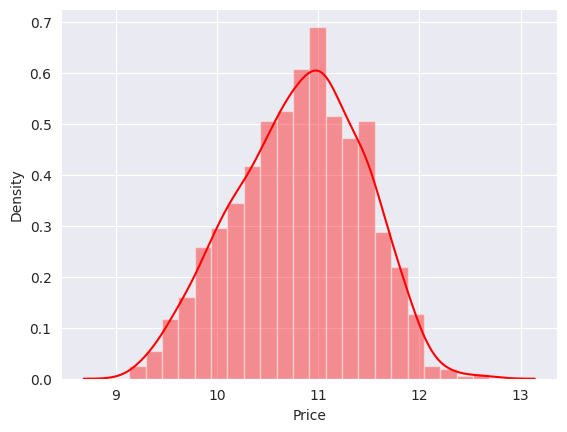

In [ ]:
sns.distplot(np.log(dflaptop1.Price), color = 'red', kde = True) # log normal distribution of Price Column
plt.show()

##**Prepare for Model Learning**

In [ ]:
X = dflaptop1.drop(columns = ['Price'])
y = np.log(dflaptop1['Price'])                  #(target variable)
# Log transform the target variable for initial model fitting

In [ ]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


##**Splitting the Data for training and testing**

We imported the necessary libraries from scikit-learn, a powerful library for machine learning in Python. The primary libraries we used were train_test_split for splitting the data and other scikit-learn modules for building and evaluating our models.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand,Os
33,Dell,Ultrabook,16,1.20,1,0,276.053530,Intel Core i7,0,512,Intel,Windows
162,Dell,Notebook,8,2.13,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
948,Dell,Notebook,4,2.36,0,0,106.113062,Intel Core i3,1000,0,AMD,Windows
591,Lenovo,Notebook,12,2.20,0,0,141.211998,AMD Processor,0,512,AMD,Windows
767,Dell,Gaming,16,2.72,1,1,282.423996,Intel Core i7,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,HP,Ultrabook,8,1.26,0,0,176.232574,Intel Core i5,0,256,Intel,Windows
1123,Dell,Notebook,4,2.09,0,0,100.454670,Intel Core i5,500,0,Intel,Others/No OS/Linux
1158,Lenovo,Notebook,8,2.50,0,0,141.211998,Intel Core i5,0,0,AMD,Windows
882,Asus,Notebook,4,1.65,0,0,111.141337,Other Intel Processor,0,0,Intel,Windows


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # Evaluating the performance of model


##**Linear Regression**

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# Step 2: Linear Regression
step2 = LinearRegression()

# Creating the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

We implemented a pipeline to streamline the training and testing process. First, we used a column transformer to encode categorical variables, which is the first step. After that, we created an object of our algorithm and passed both the steps to the pipeline. Using the pipeline object, we predict the price on new data.

In [ ]:
#Training the model
pipe.fit(X_train, y_train)

#Testing the model
y_pred = pipe.predict(X_test)

#Evaluating the performance of model
R2score = r2_score(y_test, y_pred)
print('R2 score', R2score)

AR2_score = 1-(1-R2score)*(len(y)-1)/(len(y)-X.shape[1]-2)
print('Adjusted R2 score', AR2_score)

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error(MAE)', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Means Squared Erorr(RMSE)', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE)', MAPE)

R2 score 0.811027194826019
Adjusted R2 score 0.8090743756946503
Mean Absolute Error(MAE) 0.21223107068266125
Root Means Squared Erorr(RMSE) 0.27364270733395235
Mean Absolute Percentage Error(MAPE) 0.019566827892687128


In [ ]:
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

# Evaluate the performance of the model in the original scale
R2score_original = r2_score(y_test_original, y_pred_original)
print('R2 score:', R2score_original)

AR2_score_original = 1 - (1 - R2score_original) * (len(y) - 1) / (len(y) - X.shape[1] - 2)
print('Adjusted R2 score:', AR2_score_original)

MAE_original = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', MAE_original)

RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print('Root Mean Squared Error (RMSE):', RMSE_original)

R2 score: 0.6761753418760678
Adjusted R2 score: 0.6728289821339286
Mean Absolute Error (MAE): 12859.927692696028
Root Mean Squared Error (RMSE): 19597.247999755167


##**KNN(K-Nearest Neighbour)**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Feature transformation
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# Scaling and regression
step2 = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn', KNeighborsRegressor(n_neighbors=3))
])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Training the model
pipe.fit(X_train, y_train)

# Testing the model
y_pred = pipe.predict(X_test)

# Evaluating the performance of the model
R2score = r2_score(y_test, y_pred)
print('R2 score:', R2score)

# Adjusted R2 Score
n = len(y_test)
p = X_test.shape[1]
AR2_score = 1 - (1 - R2score) * (n - 1) / (n - p - 1)
print('Adjusted R2 score:', AR2_score)

# Error metrics
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', MAPE)

# Log-Transformed Metrics (if applicable)
if np.all(y_test > 0) and np.all(y_pred > 0):  # Ensure valid log transformation
    y_test_original = np.exp(y_test)
    y_pred_original = np.exp(y_pred)
    print('------------------------------------------------------------------------------------')
    # Evaluate performance on original scale
    R2score_original = r2_score(y_test_original, y_pred_original)
    print('R2 score (original scale):', R2score_original)

    AR2_score_original = 1 - (1 - R2score_original) * (n - 1) / (n - p - 1)
    print('Adjusted R2 score (original scale):', AR2_score_original)

    MAE_original = mean_absolute_error(y_test_original, y_pred_original)
    print('Mean Absolute Error (MAE, original scale):', MAE_original)

    RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    print('Root Mean Squared Error (RMSE, original scale):', RMSE_original)


R2 score: 0.7685194525845577
Adjusted R2 score: 0.7570410783325523
Mean Absolute Error (MAE): 0.21368629242087692
Root Mean Squared Error (RMSE): 0.3028596903265513
Mean Absolute Percentage Error (MAPE): 0.01969214855427871
------------------------------------------------------------------------------------
R2 score (original scale): 0.686467768450183
Adjusted R2 score (original scale): 0.6709207156460598
Mean Absolute Error (MAE, original scale): 12236.432748848714
Root Mean Squared Error (RMSE, original scale): 19283.294212684817


##**RandomForestRegressor**

In [ ]:
# Step 1: Feature transformation
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# Step 2: Random Forest Regressor
step2 = RandomForestRegressor(
    n_estimators=200,
    random_state=3,
    max_samples=0.8,
    max_features=0.8,
    max_depth=12,
    bootstrap=True  # Required for max_samples to work
)

# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Training the model
pipe.fit(X_train, y_train)

# Testing the model
y_pred = pipe.predict(X_test)

# Evaluating the performance of the model
R2score = r2_score(y_test, y_pred)
print('R2 score:', R2score)

# Adjusted R² Score
n = len(y_test)
p = X_test.shape[1]
AR2_score = 1 - (1 - R2score) * (n - 1) / (n - p - 1)
print('Adjusted R2 score:', AR2_score)

# Error Metrics
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', MAPE)

# Log Transformation Check
if np.all(y_test > 0) and np.all(y_pred > 0):  # Ensure valid log transformation
    y_test_original = np.exp(y_test)
    y_pred_original = np.exp(y_pred)

    print('------------------------------------------------------------------------------------')
    # Evaluate performance on original scale
    R2score_original = r2_score(y_test_original, y_pred_original)
    print('R2 score (original scale):', R2score_original)

    AR2_score_original = 1 - (1 - R2score_original) * (n - 1) / (n - p - 1)
    print('Adjusted R2 score (original scale):', AR2_score_original)

    MAE_original = mean_absolute_error(y_test_original, y_pred_original)
    print('Mean Absolute Error (MAE, original scale):', MAE_original)

    RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    print('Root Mean Squared Error (RMSE, original scale):', RMSE_original)


R2 score: 0.8910141702570192
Adjusted R2 score: 0.8856099142367061
Mean Absolute Error (MAE): 0.15836326152226482
Root Mean Squared Error (RMSE): 0.20781133918641384
Mean Absolute Percentage Error (MAPE): 0.014620219125926115
------------------------------------------------------------------------------------
R2 score (original scale): 0.8067772144226333
Adjusted R2 score (original scale): 0.7971959192700366
Mean Absolute Error (MAE, original scale): 9614.585689752363
Root Mean Squared Error (RMSE, original scale): 15138.027858139234


##**ADABoost**

In [ ]:
# Step 1: Feature transformation
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

step2 = AdaBoostRegressor(n_estimators=20, learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])


#Training the model
pipe.fit(X_train, y_train)

#Testing the model
y_pred = pipe.predict(X_test)

#Evaluating the performance of model
R2score = r2_score(y_test, y_pred)
print('R2 score', R2score)

AR2_score = 1-(1-R2score)*(len(y)-1)/(len(y)-X.shape[1]-2)
print('Adjusted R2 score', AR2_score)

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error(MAE)', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Means Squared Erorr(RMSE)', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE)', MAPE)

y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)
print('------------------------------------------------------------------------------------')
# Evaluate the performance of the model in the original scale
R2score_original = r2_score(y_test_original, y_pred_original)
print('R2 score:', R2score_original)

AR2_score_original = 1 - (1 - R2score_original) * (len(y) - 1) / (len(y) - X.shape[1] - 2)
print('Adjusted R2 score:', AR2_score_original)

MAE_original = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', MAE_original)

RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print('Root Mean Squared Error (RMSE):', RMSE_original)


R2 score 0.8246324785457915
Adjusted R2 score 0.8228202545562011
Mean Absolute Error(MAE) 0.21455541814614865
Root Means Squared Erorr(RMSE) 0.26360813318672116
Mean Absolute Percentage Error(MAPE) 0.01996004264530962
------------------------------------------------------------------------------------
R2 score: 0.7499856337291665
Adjusted R2 score: 0.747402019451328
Mean Absolute Error (MAE): 12296.304008561396
Root Mean Squared Error (RMSE): 17219.58232559657


##**SVM(Support Vector Machine)**

In [ ]:
# Step 1: Feature transformation
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)


step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])


#Training the model
pipe.fit(X_train, y_train)

#Testing the model
y_pred = pipe.predict(X_test)

#Evaluating the performance of model
R2score = r2_score(y_test, y_pred)
print('R2 score', R2score)

AR2_score = 1-(1-R2score)*(len(y)-1)/(len(y)-X.shape[1]-2)
print('Adjusted R2 score', AR2_score)

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error(MAE)', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Means Squared Erorr(RMSE)', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE)', MAPE)

y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)
print('------------------------------------------------------------------------------------')
# Evaluate the performance of the model in the original scale
R2score_original = r2_score(y_test_original, y_pred_original)
print('R2 score:', R2score_original)

AR2_score_original = 1 - (1 - R2score_original) * (len(y) - 1) / (len(y) - X.shape[1] - 2)
print('Adjusted R2 score:', AR2_score_original)

MAE_original = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', MAE_original)

RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print('Root Mean Squared Error (RMSE):', RMSE_original)


R2 score 0.845064779840003
Adjusted R2 score 0.8434637004583815
Mean Absolute Error(MAE) 0.19048308360641805
Root Means Squared Erorr(RMSE) 0.2477760358295621
Mean Absolute Percentage Error(MAPE) 0.017585289629984055
------------------------------------------------------------------------------------
R2 score: 0.7402957756170725
Adjusted R2 score: 0.7376120276703491
Mean Absolute Error (MAE): 11421.843649290411
Root Mean Squared Error (RMSE): 17550.101709923318


##**XGboost**

In [ ]:
# Step 1: Feature transformation
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)


step2 = XGBRegressor(n_estimators=39, learning_rate = 0.5,max_depth=5)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])


#Training the model
pipe.fit(X_train, y_train)

#Testing the model
y_pred = pipe.predict(X_test)

#Evaluating the performance of model
R2score = r2_score(y_test, y_pred)
print('R2 score', R2score)

AR2_score = 1-(1-R2score)*(len(y)-1)/(len(y)-X.shape[1]-2)
print('Adjusted R2 score', AR2_score)

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error(MAE)', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Means Squared Erorr(RMSE)', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE)', MAPE)

y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)
print('------------------------------------------------------------------------------------')
# Evaluate the performance of the model in the original scale
R2score_original = r2_score(y_test_original, y_pred_original)
print('R2 score:', R2score_original)

AR2_score_original = 1 - (1 - R2score_original) * (len(y) - 1) / (len(y) - X.shape[1] - 2)
print('Adjusted R2 score:', AR2_score_original)

MAE_original = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', MAE_original)

RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print('Root Mean Squared Error (RMSE):', RMSE_original)

R2 score 0.9082957531239415
Adjusted R2 score 0.9073480939749838
Mean Absolute Error(MAE) 0.1467333328156084
Root Means Squared Erorr(RMSE) 0.1906246010882408
Mean Absolute Percentage Error(MAPE) 0.013522625699285737
------------------------------------------------------------------------------------
R2 score: 0.8380053049268499
Adjusted R2 score: 0.8363312738966822
Mean Absolute Error (MAE): 9070.929287322306
Root Mean Squared Error (RMSE): 13860.871173029816


##**Voting Regressor**

In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
# Step 1: Feature transformation
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=12)
gbdt = GradientBoostingRegressor(n_estimators=500,max_features=0.5,random_state=3, learning_rate=0.1)
xgb = XGBRegressor(n_estimators=39, learning_rate = 0.5,max_depth=5)


step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)], weights = [1,1,5])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


#Training the model
pipe.fit(X_train, y_train)

#Testing the model
y_pred = pipe.predict(X_test)

#Evaluating the performance of model
R2score = r2_score(y_test, y_pred)
print('R2 score', R2score)

AR2_score = 1-(1-R2score)*(len(y)-1)/(len(y)-X.shape[1]-2)
print('Adjusted R2 score', AR2_score)

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error(MAE)', MAE)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Means Squared Erorr(RMSE)', RMSE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE)', MAPE)

y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)
print('------------------------------------------------------------------------------------')
# Evaluate the performance of the model in the original scale
R2score_original = r2_score(y_test_original, y_pred_original)
print('R2 score:', R2score_original)

AR2_score_original = 1 - (1 - R2score_original) * (len(y) - 1) / (len(y) - X.shape[1] - 2)
print('Adjusted R2 score:', AR2_score_original)

MAE_original = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (MAE):', MAE_original)

RMSE_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print('Root Mean Squared Error (RMSE):', RMSE_original)


R2 score 0.9111926963509578
Adjusted R2 score 0.9102749738172237
Mean Absolute Error(MAE) 0.14393314900204346
Root Means Squared Erorr(RMSE) 0.18758951723124204
Mean Absolute Percentage Error(MAPE) 0.01327006259503754
------------------------------------------------------------------------------------
R2 score: 0.8413131274651812
Adjusted R2 score: 0.8396732790208628
Mean Absolute Error (MAE): 8864.302070862574
Root Mean Squared Error (RMSE): 13718.62646695445


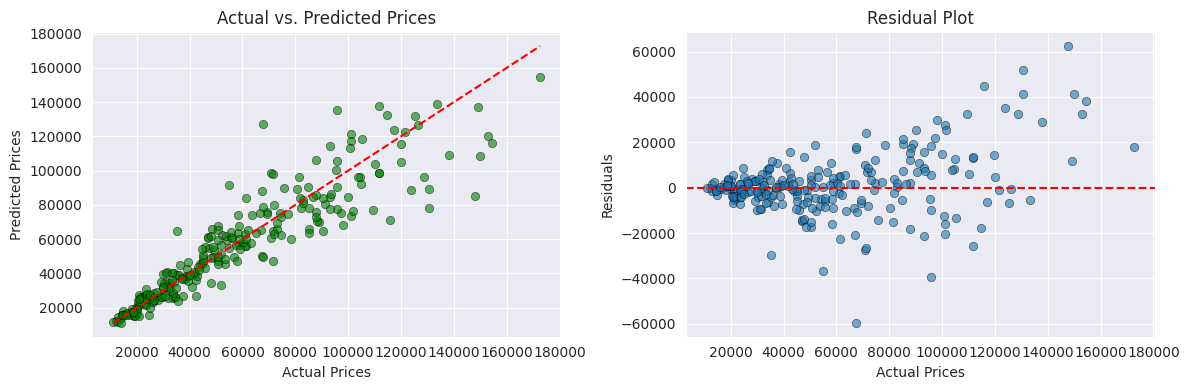

In [ ]:
y_pred = np.exp(pipe.predict(X_test)).astype(int)
y_test1 = np.exp(y_test).astype(int)

# Scatter Plot with Line of Best Fit
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test1, y=y_pred, alpha=0.6, edgecolor='k',color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
sns.lineplot(x=y_test1, y=y_test1, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)

# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test1 - y_pred
sns.scatterplot(x=y_test1, y=residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

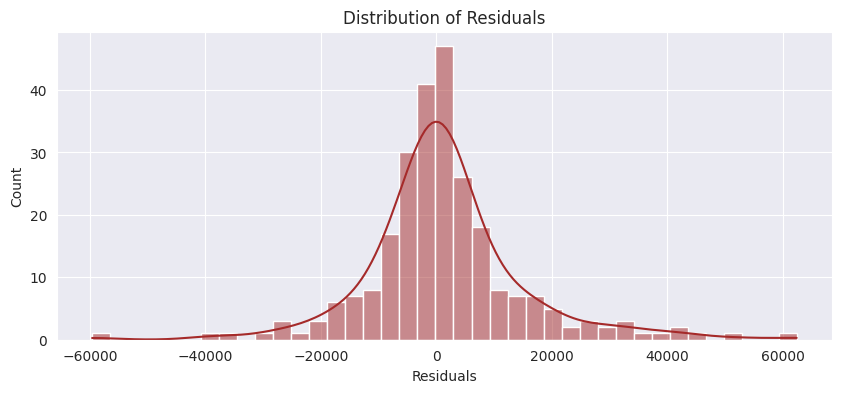

In [ ]:
# Histogram of Residuals
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True,color='brown')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

Strong Performance: The model shows a strong linear relationship between actual and predicted prices.
Price Deviation: Predictions are less accurate for more expensive laptops. This is because of less amount of data present.
Normal Residuals: Errors are roughly normally distributed around zero, but with some variability.

In [ ]:
dflap = dflaptop1.copy()
dflap['prediction'] = pipe.predict(dflap.drop('Price',axis=1))
dflap.prediction = np.exp(dflap.prediction)
dflap['Segment'] = pd.qcut(dflap['Price'], q=3, labels=['Budget', 'Mid-Range', 'High-End'])

fig = px.box(dflap, x='Segment', y='prediction', title='Model Performance on High-End vs Budget Laptops',
             labels={'Segment': 'Segment', 'prediction': 'Predicted Price'},color = 'Segment', template='plotly_dark',width = 600)
fig.update_layout(yaxis_title='Predicted Price')

# Customize the plot for better readability and engagement
fig.update_layout(
    title='Model Performance on High-End vs Budget Laptops',
    xaxis_title='Segment',
    yaxis_title='Predicted Price',

)

fig.show()

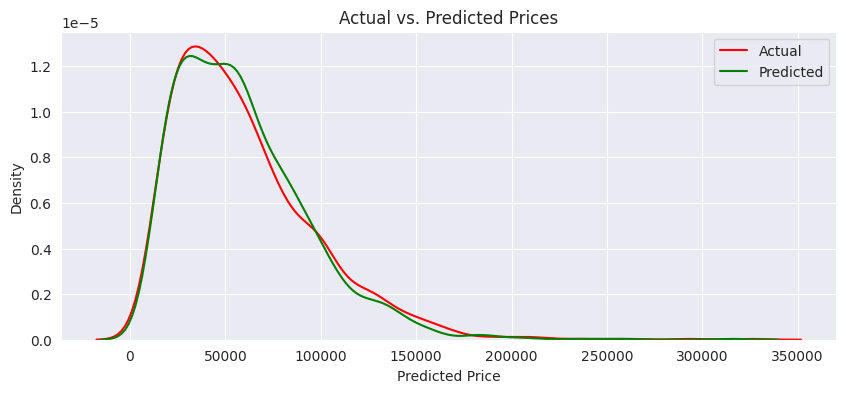

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(dflap['Price'],hist=False,color='red',label='Actual')
sns.distplot(dflap['prediction'],hist=False,color='green',label='Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

The predicted price distribution closely matches the actual price distribution, with only minor deviations, suggesting a generally good fit.

##**Comparing the Models**

In [ ]:
compare_data = [['LinearRegressor', 0.81, 0.27],
                ['KNNRegressor', 0.79, 0.29],
                ['RandomforestRegressor', 0.89, 0.21],
                ['AdaBoostRegressor', 0.82, 0.26],
                ['SVMRegressor', 0.84, 0.25],
                ['XGboostRegressor', 0.91, 0.19],
                ['VotingRegressor', 0.91, 0.18]]

compare_df = pd.DataFrame(compare_data, columns=['Model', 'AdjustedR2_score', 'RMSE'])
compare_df


,Model,AdjustedR2_score,RMSE
0,LinearRegressor,0.81,0.27
1,KNNRegressor,0.79,0.29
2,RandomforestRegressor,0.89,0.21
3,AdaBoostRegressor,0.82,0.26
4,SVMRegressor,0.84,0.25
5,XGboostRegressor,0.91,0.19
6,VotingRegressor,0.91,0.18


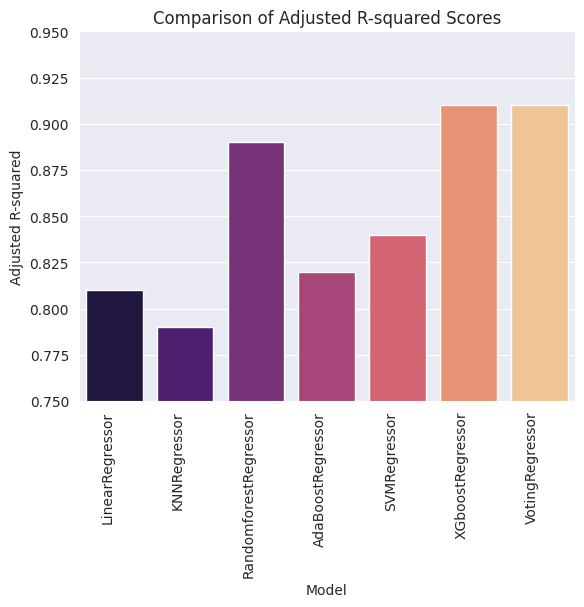

In [ ]:
sns.barplot(x='Model', y='AdjustedR2_score', data=compare_df, palette='magma')
plt.title('Comparison of Adjusted R-squared Scores')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Adjusted R-squared')
plt.ylim(0.75, 0.95)
plt.show()

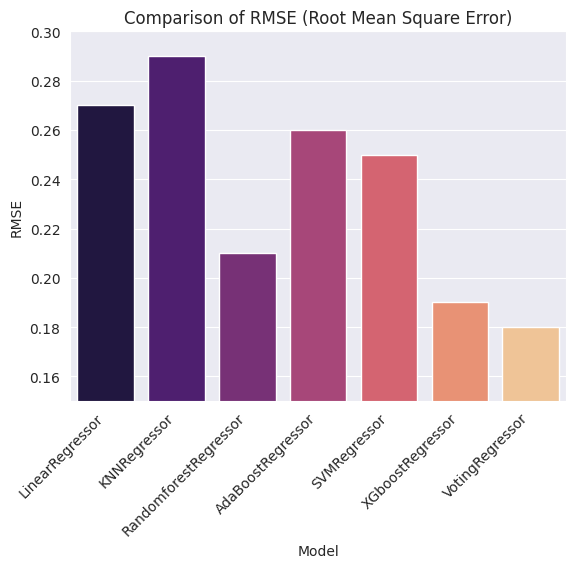

In [ ]:
sns.barplot(x='Model', y='RMSE', data=compare_df, palette='magma')
plt.title('Comparison of RMSE (Root Mean Square Error)')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.15, 0.3)
plt.show()

##**Voting Regressor and Xgboost are best fit for the model**
The adjusted R2Score of above two model is larger as compared to other model and RMSE value of these model is less as compared to other model.

* Adjusted R2 score 0.91(Voting Regressor)
* Adjusted R2 score 0.90(Xgboost Regressor)

We used several models for our regression analysis, including Linear Regression, KNN Regressor, Random Forest Regressor, SVM Regressor, XGBoost Regressor, and Voting Regressor. We evaluated these models using metrics such as Adjusted R² score and RMSE (Root Mean Squared Error). By looking at the graph, we concluded that the Voting Regressor and XGBoost Regressor are the best fit for the model. We chose the Voting Regressor for our final model due to its slightly better performance.

##**Deploying the model**

In [ ]:
import pickle
pickle.dump(dflaptop1,open('dflaptop1.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

We used Gradio to develop a web app for predicting laptop prices. The app will feature a form that collects user inputs corresponding to the dataset features. Using the saved model, we will predict the output and display it to the user. Gradio, an open-source Python package, enables rapid development of demos and web applications for machine learning models Deployed web app on Hugging face.

In [ ]:
! pip install gradio  #using gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle

dflaptop1 = pickle.load(open('dflaptop1.pkl','rb'))
pipe = pickle.load(open('pipe.pkl','rb'))


# Define Gradio components
company = gr.Dropdown(label='Brand', choices=['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
                                              'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
                                              'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'])

Type = gr.Dropdown(label='Type', choices=['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
                                          'Workstation', 'Netbook'])

Ram = gr.Dropdown(label='RAM(in GB)', choices=[2, 4, 6, 8, 12, 16, 24, 32, 64])

Weights = gr.Number(label='Weight(kg)')

Touchscreen = gr.Dropdown(label='Touchscreen', choices=['No', 'Yes'])

Ips = gr.Dropdown(label='IPS', choices=['No', 'Yes'])


Resolution = gr.Dropdown(label='Resolution', choices=['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2560x1600', '2880x1800', '2304x1440'])

Screen_size = gr.Number(label='Screen Size(Inches)')

Cpu = gr.Dropdown(label='Cpu_Brand', choices=['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
                                              'Other Intel Processor'])

Hdd = gr.Dropdown(label='HDD', choices=[0, 32, 128, 256, 500, 512, 1000, 1024, 2000, 2048])

Sdd = gr.Dropdown(label='SSD', choices=[0, 8, 16, 32, 64, 128, 180, 256, 512, 1024, 1000])

Gpu = gr.Dropdown(label='Gpu', choices=['Intel', 'AMD', 'Nvidia'])

Os = gr.Dropdown(label='OS', choices=['Mac', 'Windows', 'Others/No OS/Linux'])



def prediction(company, Type, Ram, Weights, Touchscreen, Ips, Resolution, Screen_size, Cpu, Hdd, Sdd, Gpu, Os):
    if Touchscreen == 'Yes':
        Touchscreen = 1
    else:
        Touchscreen = 0

    if Ips == 'Yes':
        Ips = 1
    else:
        Ips = 0

    X_res = int(Resolution.split('x')[0])
    Y_res = int(Resolution.split('x')[1])
    ppi = ((X_res**2) + (Y_res**2))**0.5 / Screen_size

    df1 = pd.DataFrame([[company, Type, Ram, Weights, Touchscreen, Ips , ppi, Cpu, Hdd, Sdd, Gpu, Os]],
                       columns=['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips' , 'ppi', 'Cpu_Brand', 'HDD', 'SSD', 'Gpu_Brand', 'Os'])

    output = int(np.exp(pipe.predict(df1)[0]))
    return output


demo = gr.Interface(fn=prediction, inputs=[company, Type, Ram, Weights,Touchscreen, Ips , Resolution, Screen_size, Cpu, Hdd, Sdd, Gpu, Os],
                    title="Laptop Price Predictor",
                    description="Predict the price of a laptop based on its features.",
                    outputs=gr.Number(label="Predicted Laptop Price"),
                    theme=gr.Theme.from_hub('HaleyCH/HaleyCH_Theme')
                    )

demo.launch(share=True)

themes/theme_schema@0.0.1.json:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cc9737926b09edf7c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
dflaptop1 = pickle.load(open('dflaptop1.pkl','rb'))
pipe = pickle.load(open('pipe.pkl','rb'))

##**Deploy the model on Hugging Face**

In [ ]:
app_code = '''import gradio as gr
import pandas as pd
import numpy as np
import pickle


dflaptop1 = pickle.load(open('dflaptop1.pkl','rb'))
pipe = pickle.load(open('pipe.pkl','rb'))


# Define Gradio components
company = gr.Dropdown(label='Brand', choices=['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
                                              'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
                                              'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'])

Type = gr.Dropdown(label='Type', choices=['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
                                          'Workstation', 'Netbook'])

Ram = gr.Dropdown(label='RAM(in GB)', choices=[2, 4, 6, 8, 12, 16, 24, 32, 64])

Weights = gr.Number(label='Weight(kg)')

Touchscreen = gr.Dropdown(label='Touchscreen', choices=['No', 'Yes'])

Ips = gr.Dropdown(label='IPS', choices=['No', 'Yes'])


Resolution = gr.Dropdown(label='Resolution', choices=['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2560x1600', '2880x1800', '2304x1440'])

Screen_size = gr.Number(label='Screen Size(Inches)')

Cpu = gr.Dropdown(label='Cpu_Brand', choices=['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
                                              'Other Intel Processor'])

Hdd = gr.Dropdown(label='HDD', choices=[0, 32, 128, 256, 500, 512, 1000, 1024, 2000, 2048])

Sdd = gr.Dropdown(label='SSD', choices=[0, 8, 16, 32, 64, 128, 180, 256, 512, 1024, 1000])

Gpu = gr.Dropdown(label='Gpu', choices=['Intel', 'AMD', 'Nvidia'])

Os = gr.Dropdown(label='OS', choices=['Mac', 'Windows', 'Others/No OS/Linux'])



def prediction(company, Type, Ram, Weights, Touchscreen, Ips, Resolution, Screen_size, Cpu, Hdd, Sdd, Gpu, Os):
    if Touchscreen == 'Yes':
        Touchscreen = 1
    else:
        Touchscreen = 0

    if Ips == 'Yes':
        Ips = 1
    else:
        Ips = 0

    X_res = int(Resolution.split('x')[0])
    Y_res = int(Resolution.split('x')[1])
    ppi = ((X_res**2) + (Y_res**2))**0.5 / Screen_size

    df1 = pd.DataFrame([[company, Type, Ram, Weights, Touchscreen, Ips , ppi, Cpu, Hdd, Sdd, Gpu, Os]],
                       columns=['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips' , 'ppi', 'Cpu_Brand', 'HDD', 'SSD', 'Gpu_Brand', 'Os'])

    output = int(np.exp(pipe.predict(df1)[0]))
    return output


demo = gr.Interface(fn=prediction, inputs=[company, Type, Ram, Weights,Touchscreen, Ips , Resolution, Screen_size, Cpu, Hdd, Sdd, Gpu, Os],
                    title="Laptop_price_prediction",
                    description="Predict the price of a laptop based on its features.",
                    outputs=gr.Number(label="Laptop_price_prediction"),
                    theme=gr.Theme.from_hub('HaleyCH/HaleyCH_Theme'))


demo.launch(share=True)
'''


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
with open("app.py", "w") as f:
    f.write(app_code)

In [ ]:
# from huggingface_hub import HfApi

# api = HfApi()
# api.create_repo(repo_id="Shivani7378/Laptop_price_prediction", repo_type="space", private=False,space_sdk="gradio")


In [ ]:
from huggingface_hub import upload_file

# Repository ID
repo_id = "Shivani7378/Laptop_Price_Prediction"

# Upload files to the existing space
upload_file(
    path_or_fileobj="app.py",
    path_in_repo="app.py",
    repo_id=repo_id,
    repo_type="space"
)

with open("requirements.txt", "w") as f:
    f.write("gradio\nxgboost\nscikit-learn==1.5.2\nnumpy==1.25.2")

upload_file(
    path_or_fileobj="requirements.txt",
    path_in_repo="requirements.txt",
    repo_id=repo_id,
    repo_type="space"
)

upload_file(
    path_or_fileobj="dflaptop1.pkl",
    path_in_repo="dflaptop1.pkl",
    repo_id=repo_id,
    repo_type="space"
)

upload_file(
    path_or_fileobj="pipe.pkl",
    path_in_repo="pipe.pkl",
    repo_id=repo_id,
    repo_type="space"
)


No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/Shivani7378/Laptop_Price_Prediction/commit/b75c30368feed1669d83b35faad865c3e30d35cd', commit_message='Upload pipe.pkl with huggingface_hub', commit_description='', oid='b75c30368feed1669d83b35faad865c3e30d35cd', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Shivani7378/Laptop_Price_Prediction', endpoint='https://huggingface.co', repo_type='space', repo_id='Shivani7378/Laptop_Price_Prediction'), pr_revision=None, pr_num=None)

####**Link for the Model given below :** (https://huggingface.co/spaces/Shivani7378/Laptop_Price_Prediction)

####**Key Insights**
######**Brand Influence**

* Certain brands (e.g., Apple, Razer, LG, Google, Microsoft, MSl) have higher average prices
* Mid-range brands (e.g., HP, Lenovo, Dell, Asus, Acer) are competitively priced
* The brand significantly influences the price

######**Features Impact**

* RAM size significantly affects the price(Critical for performance)
* PPI(pixels per inch) - Larger, higher-resolution screens display drive up prices.
* Storage type (SSD) affects the price (Critical for performance)
* Processor brand and type influence price
* Graphical Processing Unit(GPU) affects the price of laptop

######**Project Outcomes:**
* Developed a reliable model for laptop price prediction

* Gained insights into factors influencing laptop prices

######**Question and Answers -**
**1.Can the model accurately predict the prices of laptops from lesser-known brands?**

* Generally accurate for well-known brands
* Lesser-known brands may have less consistent predictions due to fewer data points
* Model performance improves with more data from lesser-known brands

**2.Does the brand of the laptop significantly influence its price?**

* The brand significantly influences the price
* High-end brands (e.g., Apple,Razer,Google,Microsoft,&MSl) command higher prices
* Lesser-known brands often have lower prices but competitive specifications

**3.How well does the model perform on laptops with high-end specifications compared to budget laptops?**

* The model demonstrates good performance across both segments, with higher variability and potential outliers in high-end laptop predictions and consistent, reliable performance in budget laptop predictions.

**4.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?**

* Predictions for newly released laptops can be less accurate
* Requires regular updates with new data to maintain accuracy
* Incorporating recent trends and technology changes is crucial for model relevance

**5.What are the limitations and challenges in predicting laptop prices accurately?**

**Challenges:**
* Limited data from lesser-known brands affects prediction accuracy
* Rapid changes in technology and market trends require frequent model updates
* Price anomalies and outliers can skew predictions

**Limitations:**
* The model might not account for sudden market shifts
* Performance on newly released laptops may vary